# Image Completeness Detection
This notebook analyzes uploaded images to determine if they are complete or incomplete based on pixel intensity ratios.

### Import Required Libraries

In [33]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt

## Define Image Directory and Detection Function
This cell sets the directory path where your images are stored (e.g., ./test_images) and defines the is_incomplete() function. This function checks whether an image is incomplete based on the proportion of white or black pixels. An image is considered incomplete if either white or black pixel ratio exceeds a specified threshold (default: 20%).

In [39]:
# Set the directory where your images are stored
image_dir = "./test_images"  # e.g., "images", "repo/images"

def is_incomplete(image_path, white_thresh=240, black_thresh=15, ratio_thresh=0.2):
    """
    Determines if an image is incomplete based on pixel intensity ratios.

    Args:
        image_path (str): Full path to the image file
        white_thresh (int): Threshold for white pixels (default: 240)
        black_thresh (int): Threshold for black pixels (default: 15)
        ratio_thresh (float): Ratio threshold for incomplete classification (default: 0.2)

    Returns:
        bool: True if image is incomplete, False otherwise
    """
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise ValueError(f"Could not load image: {image_path}")

    total_pixels = image.size
    white_pixels = np.sum(image >= white_thresh)
    black_pixels = np.sum(image <= black_thresh)

    white_ratio = white_pixels / total_pixels
    black_ratio = black_pixels / total_pixels

    return white_ratio > ratio_thresh or black_ratio > ratio_thresh


## Analyze a Single Image for Incompleteness

In this cell, you specify the name of the image you'd like to analyze (from the directory defined earlier). The code:
Constructs the full path to the image. Uses the is_incomplete() function to determine if the image is Complete or Incomplete. Displays the grayscale version of the image

Prints key pixel statistics:
Total pixels
Percentage of white pixels (intensity ≥ 240)
Percentage of black pixels (intensity ≤ 15)

- You can change the image_name variable to analyze any other image in the folder.










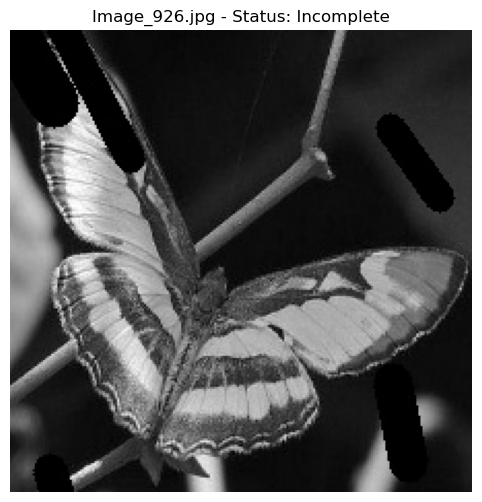


Image Statistics for Image_926.jpg:
Total pixels: 50,176
White pixels (>=240): 197 (0.39%)
Black pixels (<=15): 14,298 (28.50%)


In [45]:
# Specify the image file name you want to analyze (in the image_dir)
image_name = "Image_926.jpg"  # change this to any image in the directory

# Construct full path
image_path = os.path.join(image_dir, image_name)

# Try analyzing the image
try:
    incomplete = is_incomplete(image_path)
    status = "Incomplete" if incomplete else "Complete"

    # Load image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Display the image
    plt.figure(figsize=(8, 6))
    plt.imshow(img, cmap='gray')
    plt.title(f"{image_name} - Status: {status}")
    plt.axis("off")
    plt.show()

    # Print statistics
    total_pixels = img.size
    white_pixels = np.sum(img >= 240)
    black_pixels = np.sum(img <= 15)

    print(f"\nImage Statistics for {image_name}:")
    print(f"Total pixels: {total_pixels:,}")
    print(f"White pixels (>=240): {white_pixels:,} ({white_pixels/total_pixels:.2%})")
    print(f"Black pixels (<=15): {black_pixels:,} ({black_pixels/total_pixels:.2%})")

except Exception as e:
    print(f"Error: {e}")
